In [1]:
from PIL import Image
import os
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [2]:
data_dir = './data/images/train/images'
label_to_file = defaultdict(list)
for i in os.listdir(data_dir):
    label = i.split('_')[1]
    label_to_file[label].append(os.path.join(data_dir, i))

In [3]:
def get_histogram(file_dict, channel):
    label_to_hist = defaultdict(list)
    for label in file_dict.keys():
        for i in tqdm(file_dict[label]):
            img = cv2.imread(i)  
            histr = cv2.calcHist([img],[channel],None,[256],[0,256]) 
            label_to_hist[label].append(histr)

    for label in label_to_hist.keys():
        label_to_hist[label] = np.mean(np.array(label_to_hist[label]), axis=0)
    return label_to_hist

In [4]:
label_to_hist_blue = get_histogram(label_to_file, 0)
label_to_hist_green = get_histogram(label_to_file, 1)
label_to_hist_red = get_histogram(label_to_file, 2)

100%|██████████| 1298/1298 [00:00<00:00, 1375.71it/s]


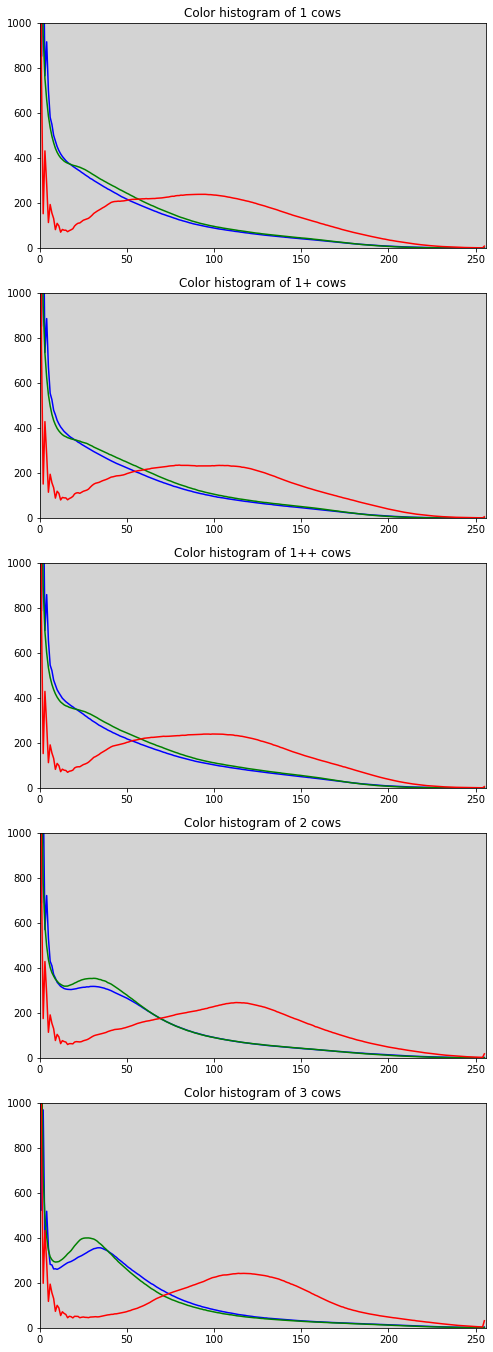

In [30]:
labels = sorted(list(label_to_file.keys()))
plt.figure(figsize=(8, 24))
plt.rcParams['axes.facecolor'] = 'lightgray'

for i in range(len(label_to_file.keys())):
    plt.subplot(5, 1, i+1)
    plt.title('Color histogram of %s cows'%labels[i])
    plt.plot(label_to_hist_blue[labels[i]],color = 'b')
    plt.plot(label_to_hist_green[labels[i]],color = 'g')
    plt.plot(label_to_hist_red[labels[i]],color = 'r')
    plt.xlim([0,256])
    plt.ylim([0,1000])
plt.show()